# Jersey Central Power & Light (JCP&L) Electricity Usage: An Analysis
### 1. Introduction

Jersey Central Power & Light (JCP&L) is one of the major utility companies that operate in New Jersey, currently serving over 1.1 million customers in the central and northern areas of the state. Its main responsibility is to maintain and manage the power lines that deliver electricity to customers within its service area. The cost of delivering the electricity includes the distribution charges and represents the regulated section of the electric bill.

Having resided in NJ before Oct. 2021 and a JCP&L customer from `Jan 2016 through Sep 2021`, I kept all my electric bills throughout my condo residence during that period. The goal of this project is to analyze my energy bill charges, consumption, and electricity rates. In addition, I want to see where I fell comparing against NJ state and national averages as well observe any correlations when plotting the average monthly temperatures.

Things to keep in mind:

- I was a 1-person household for about 95% of the period
- Condo was ~1,500 sq. ft., tri-level
- Unit was an HVAC central air
- 2-bay NAS and Mac Mini running 24/7
- Various smart bulbs and products
- Typical northeast seasons, i.e. hot summers and cold winters

The `jcpl - Jan2016-Sep2021.tsv` dataset explored in this project is from `Jan. 2016 through Sep. 2021`, which was exported from a Google Sheet I had been maintaining during that time period.

Let's import `pandas` first and read in the dataset:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/jcpl - Jan2016-Sep2021.tsv', sep='\t', header=0, names=[
    'statement_date',
    'read_from_date',
    'read_from',
    'read_to_date',
    'read_to',
    'customer_charge',
    'basic_generation_service',
    'delivery_service_charges',
    'consumption_bill_charges',
    'notes'
], index_col=0, parse_dates=['statement_date', 'read_from_date', 'read_to_date'])

df.head()

,read_from_date,read_from,read_to_date,read_to,customer_charge,basic_generation_service,delivery_service_charges,consumption_bill_charges,notes
statement_date,,,,,,,,,
2016-01-25,2016-01-12,"54,808",2016-01-21,"54,900",$0.64,$9.37,$3.42,$27.43,Pro-rated; includes one-time Service Charge: $...
2016-02-23,2016-01-22,"54,900",2016-02-19,"55,251",$1.92,$35.79,$13.03,$50.74,NaN
2016-03-23,2016-02-20,"55,251",2016-03-21,"55,497",$1.92,$25.37,$9.12,$36.41,NaN
2016-04-21,2016-03-22,"55,497",2016-04-19,"55,714",$1.92,$22.50,$8.05,$32.47,NaN
2016-05-19,2016-04-20,"55,714",2016-05-17,"55,917",$1.92,$21.05,$7.53,$30.50,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69 entries, 2016-01-25 to 2021-09-21
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   read_from_date            69 non-null     datetime64[ns]
 1   read_from                 69 non-null     object        
 2   read_to_date              69 non-null     datetime64[ns]
 3   read_to                   69 non-null     object        
 4   customer_charge           69 non-null     object        
 5   basic_generation_service  69 non-null     object        
 6   delivery_service_charges  69 non-null     object        
 7   consumption_bill_charges  69 non-null     object        
 8   notes                     2 non-null      object        
dtypes: datetime64[ns](2), object(7)
memory usage: 5.4+ KB


In [4]:
df.tail()

,read_from_date,read_from,read_to_date,read_to,customer_charge,basic_generation_service,delivery_service_charges,consumption_bill_charges,notes
statement_date,,,,,,,,,
2021-05-21,2021-04-20,"71,742",2021-05-19,"71,979",$2.78,$23.79,$8.55,$35.12,NaN
2021-06-21,2021-05-20,"71,979",2021-06-17,"72,273",$2.78,$25.69,$7.76,$36.23,NaN
2021-07-21,2021-06-18,"72,273",2021-07-19,"72,787",$2.78,$43.88,$13.79,$60.45,NaN
2021-08-21,2021-07-20,"72,787",2021-08-18,"73,198",$2.78,$35.00,$11.13,$48.91,NaN
2021-09-21,2021-08-19,"73,198",2021-09-15,"73,516",$2.78,$27.01,$8.61,$38.40,Pro-rated


I moved out and ended my service on 09/15/21, hence the pro-rated note and amounts. Let's add 3 more rows for Oct-Dec, 2021 and zero them out so we can see the full year 2021 when we plot the data on various charts:

In [5]:
for month in ['Oct 2021', 'Nov 2021', 'Dec 2021']:
    df.loc[pd.to_datetime(month)] = [
        pd.to_datetime(month)
        , 0
        , pd.to_datetime(month)
        , 0
        , '$0.00'
        , '$0.00'
        , '$0.00'
        , '$0.00'
        , ''
    ]

df.tail()

,read_from_date,read_from,read_to_date,read_to,customer_charge,basic_generation_service,delivery_service_charges,consumption_bill_charges,notes
statement_date,,,,,,,,,
2021-08-21,2021-07-20,"72,787",2021-08-18,"73,198",$2.78,$35.00,$11.13,$48.91,NaN
2021-09-21,2021-08-19,"73,198",2021-09-15,"73,516",$2.78,$27.01,$8.61,$38.40,Pro-rated
2021-10-01,2021-10-01,0,2021-10-01,0,$0.00,$0.00,$0.00,$0.00,
2021-11-01,2021-11-01,0,2021-11-01,0,$0.00,$0.00,$0.00,$0.00,
2021-12-01,2021-12-01,0,2021-12-01,0,$0.00,$0.00,$0.00,$0.00,


### 2. Data Wrangling
Let's start by removing the commas from `read_from` and `read_to` columns and converting them to `int` so we can calculate the difference between the two and compute my energy consumption:

In [6]:
df[['read_from', 'read_to']] = df[['read_from', 'read_to']].replace(',', '', regex=True).astype(int)
df.tail()

,read_from_date,read_from,read_to_date,read_to,customer_charge,basic_generation_service,delivery_service_charges,consumption_bill_charges,notes
statement_date,,,,,,,,,
2021-08-21,2021-07-20,72787,2021-08-18,73198,$2.78,$35.00,$11.13,$48.91,NaN
2021-09-21,2021-08-19,73198,2021-09-15,73516,$2.78,$27.01,$8.61,$38.40,Pro-rated
2021-10-01,2021-10-01,0,2021-10-01,0,$0.00,$0.00,$0.00,$0.00,
2021-11-01,2021-11-01,0,2021-11-01,0,$0.00,$0.00,$0.00,$0.00,
2021-12-01,2021-12-01,0,2021-12-01,0,$0.00,$0.00,$0.00,$0.00,


Next let's also remove the dollar signs and commas from all the `price` columns and convert them all to `float` dtype so we can perform arithmetic:

In [7]:
df[df.columns[4:8]] = df[df.columns[4:8]].replace('[\$,]', '', regex=True).astype(float)
df.head()

,read_from_date,read_from,read_to_date,read_to,customer_charge,basic_generation_service,delivery_service_charges,consumption_bill_charges,notes
statement_date,,,,,,,,,
2016-01-25,2016-01-12,54808,2016-01-21,54900,0.64,9.37,3.42,27.43,Pro-rated; includes one-time Service Charge: $...
2016-02-23,2016-01-22,54900,2016-02-19,55251,1.92,35.79,13.03,50.74,NaN
2016-03-23,2016-02-20,55251,2016-03-21,55497,1.92,25.37,9.12,36.41,NaN
2016-04-21,2016-03-22,55497,2016-04-19,55714,1.92,22.50,8.05,32.47,NaN
2016-05-19,2016-04-20,55714,2016-05-17,55917,1.92,21.05,7.53,30.50,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2016-01-25 to 2021-12-01
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   read_from_date            72 non-null     datetime64[ns]
 1   read_from                 72 non-null     int64         
 2   read_to_date              72 non-null     datetime64[ns]
 3   read_to                   72 non-null     int64         
 4   customer_charge           72 non-null     float64       
 5   basic_generation_service  72 non-null     float64       
 6   delivery_service_charges  72 non-null     float64       
 7   consumption_bill_charges  72 non-null     float64       
 8   notes                     5 non-null      object        
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 5.6+ KB


In [9]:
df.index

DatetimeIndex(['2016-01-25', '2016-02-23', '2016-03-23', '2016-04-21',
               '2016-05-19', '2016-06-20', '2016-07-21', '2016-08-19',
               '2016-09-20', '2016-10-19', '2016-11-18', '2016-12-21',
               '2017-01-23', '2017-02-21', '2017-03-22', '2017-04-19',
               '2017-05-23', '2017-06-22', '2017-07-24', '2017-08-23',
               '2017-09-22', '2017-10-23', '2017-11-21', '2017-12-19',
               '2018-01-23', '2018-02-21', '2018-03-22', '2018-04-20',
               '2018-05-22', '2018-06-20', '2018-07-19', '2018-08-21',
               '2018-09-20', '2018-10-19', '2018-11-20', '2018-12-19',
               '2019-01-22', '2019-02-20', '2019-03-21', '2019-04-19',
               '2019-05-21', '2019-06-20', '2019-07-22', '2019-08-21',
               '2019-09-19', '2019-10-21', '2019-11-18', '2019-12-20',
               '2020-01-21', '2020-02-19', '2020-03-19', '2020-04-21',
               '2020-05-19', '2020-06-19', '2020-07-21', '2020-08-20',
      

The first month's bill from Jan. 2016 was pro-rated at 9 days, since I had just moved in that month. As it includes a one-time $14.00 service charge, let's subtract it out as leaving it in will inflate calculations:

In [10]:
df.loc['Jan 2016', 'consumption_bill_charges']

statement_date
2016-01-25    27.43
Name: consumption_bill_charges, dtype: float64

In [11]:
# remove one-time $14.00 service charge from Jan 2016 bill
df.loc['Jan 2016', 'consumption_bill_charges'] = df.loc['Jan 2016', 'consumption_bill_charges'] - 14

In [12]:
df.loc['Jan 2016', 'consumption_bill_charges']

statement_date
2016-01-25    13.43
Name: consumption_bill_charges, dtype: float64

A table of how the bill charges are calculated:


| Charge                   | Calculation                                                           |
|--------------------------|-----------------------------------------------------------------------|
| Consumption Bill         | Customer Charge + Basic Generation Service + Delivery Service Charges |
| Basic Generation Service | kWh * Basic Generation Service Rate                                   |
| Delivery Service         | kWh * Delivery Service Charge Rate                                    |

Being on a `tiered` billing, my rates changed and scaled based on the amount consumed and also the time of the year (seasonal). But I did not include them when I was initially maintaining the Google Sheet. While the analysis won't be accurate to the decimal point, it suffices for simplicity's sake and achieving this project's goal.

Let's supplement the dataframe with additional columns derived from the data we already have:

- `consumption_kwh` = energy in kWh consumed for the month from the meter readings
- `basic_generation_service_rate`
- `delivery_service_charge_rate`
- `kwh_per_dollar` = how much 1 kWh cost

In [13]:
df['consumption_kwh'] = df.read_to - df.read_from
df['basic_generation_service_rate'] = df.basic_generation_service / df.consumption_kwh
df['delivery_service_charge_rate'] = df.delivery_service_charges / df.consumption_kwh
df['kwh_per_dollar'] = df.consumption_bill_charges / df.consumption_kwh

In [14]:
df.head()

,read_from_date,read_from,read_to_date,read_to,customer_charge,basic_generation_service,delivery_service_charges,consumption_bill_charges,notes,consumption_kwh,basic_generation_service_rate,delivery_service_charge_rate,kwh_per_dollar
statement_date,,,,,,,,,,,,,
2016-01-25,2016-01-12,54808,2016-01-21,54900,0.64,9.37,3.42,13.43,Pro-rated; includes one-time Service Charge: $...,92,0.101848,0.037174,0.145978
2016-02-23,2016-01-22,54900,2016-02-19,55251,1.92,35.79,13.03,50.74,NaN,351,0.101966,0.037123,0.144558
2016-03-23,2016-02-20,55251,2016-03-21,55497,1.92,25.37,9.12,36.41,NaN,246,0.103130,0.037073,0.148008
2016-04-21,2016-03-22,55497,2016-04-19,55714,1.92,22.50,8.05,32.47,NaN,217,0.103687,0.037097,0.149631
2016-05-19,2016-04-20,55714,2016-05-17,55917,1.92,21.05,7.53,30.50,NaN,203,0.103695,0.037094,0.150246


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2016-01-25 to 2021-12-01
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   read_from_date                 72 non-null     datetime64[ns]
 1   read_from                      72 non-null     int64         
 2   read_to_date                   72 non-null     datetime64[ns]
 3   read_to                        72 non-null     int64         
 4   customer_charge                72 non-null     float64       
 5   basic_generation_service       72 non-null     float64       
 6   delivery_service_charges       72 non-null     float64       
 7   consumption_bill_charges       72 non-null     float64       
 8   notes                          5 non-null      object        
 9   consumption_kwh                72 non-null     int64         
 10  basic_generation_service_rate  69 non-null     float64       
 11  d

Let's add in some more time series columns for usage in plotting the charts:

- `month` = the month of the bill
- `year` = the year of the bill
- `quarter` = the quarter of the bill
- `read_days` = the number of days between the meter readings

In [16]:
df['month'] = df.index.strftime('%b')
df['year'] = df.index.year
df['read_days'] = (df['read_to_date'] - df['read_from_date']).astype('timedelta64[D]').astype(int)

Let's re-arrange the columns:

In [17]:
df = df[[
    'read_from_date',
    'read_from',
    'read_to_date',
    'read_to',
    'consumption_kwh',
    'customer_charge',
    'basic_generation_service_rate',
    'basic_generation_service',
    'delivery_service_charge_rate',
    'delivery_service_charges',
    'consumption_bill_charges',
    'kwh_per_dollar',
    'month',
    'year',
    'read_days',
    'notes'
]]

In [18]:
df.sample(5)

,read_from_date,read_from,read_to_date,read_to,consumption_kwh,customer_charge,basic_generation_service_rate,basic_generation_service,delivery_service_charge_rate,delivery_service_charges,consumption_bill_charges,kwh_per_dollar,month,year,read_days,notes
statement_date,,,,,,,,,,,,,,,,
2017-10-23,2017-09-21,60607,2017-10-19,60819,212,2.98,0.094858,20.11,0.039953,8.47,31.56,0.148868,Oct,2017,28,NaN
2019-06-20,2019-05-18,65561,2019-06-18,65754,193,2.78,0.089637,17.30,0.024560,4.74,24.82,0.128601,Jun,2019,31,NaN
2016-11-18,2016-10-18,57699,2016-11-16,57949,250,1.92,0.100360,25.09,0.039640,9.91,36.92,0.147680,Nov,2016,29,NaN
2018-12-19,2018-11-17,64213,2018-12-17,64540,327,2.83,0.104006,34.01,0.036728,12.01,48.85,0.149388,Dec,2018,30,NaN
2016-10-19,2016-09-17,57487,2016-10-17,57699,212,1.92,0.100377,21.28,0.039670,8.41,31.61,0.149104,Oct,2016,30,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2016-01-25 to 2021-12-01
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   read_from_date                 72 non-null     datetime64[ns]
 1   read_from                      72 non-null     int64         
 2   read_to_date                   72 non-null     datetime64[ns]
 3   read_to                        72 non-null     int64         
 4   consumption_kwh                72 non-null     int64         
 5   customer_charge                72 non-null     float64       
 6   basic_generation_service_rate  69 non-null     float64       
 7   basic_generation_service       72 non-null     float64       
 8   delivery_service_charge_rate   69 non-null     float64       
 9   delivery_service_charges       72 non-null     float64       
 10  consumption_bill_charges       72 non-null     float64       
 11  k

### 3. Analyze the dataset

Now that we have the dataframe initialized, let's explore it.

#### 3.1 What was my average monthly bill?

In [20]:
# exclude Jan 2016 and Oct-Dec 2021
print('${:,.2f}'.format(df[1:-3].consumption_bill_charges.mean()), 'average monthly bill')

$37.49 average monthly bill


#### 3.2 What was my average monthly kWh energy consumption?

In [21]:
# exclude Oct-Dec 2021
print(round(df[:-3].consumption_kwh.mean(), 0), 'average kWh per month')

271.0 average kWh per month


#### 3.3 What was my average daily kWh energy consumption?

In [22]:
# exclude Oct-Dec 2021
date_start = df.read_from_date.min()
date_end = df[:-3].read_to_date.max()
date_diff = date_end - date_start
total_consumption_kwh = df[:-3].consumption_kwh.sum()

print('date_start:', date_start.strftime('%m/%d/%Y') )
print('date_end:', date_end.strftime('%m/%d/%Y'))
print('date_diff:', date_diff.days)
print('total_consumption_kwh:', total_consumption_kwh, '\n')

print(round(df[:-3].consumption_kwh.sum() / date_diff.days , 0), 'average kWh per day')

date_start: 01/12/2016
date_end: 09/15/2021
date_diff: 2073
total_consumption_kwh: 18708 

9.0 average kWh per day


#### 3.4 What was my average monthly kwh per dollar cost?

In [23]:
# exclude Oct-Dec 2021
print('$', df[:-3].kwh_per_dollar.mean(), 'average kwh per dollar per month')

$ 0.1400261356593982 average kwh per dollar per month


#### 3.5 What is the distribution of the number of days between the kWh meter readings?

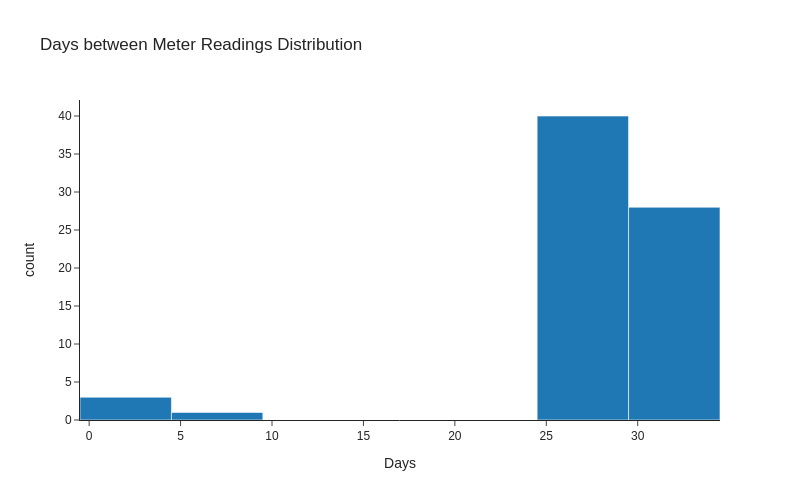

In [24]:
import plotly.express as px
import plotly.io as pio

pio.templates.default = 'simple_white'

def show_fig():
    fig.show(renderer='png', width=800)
    
fig = px.histogram(df, x='read_days', title='Days between Meter Readings Distribution', labels={'read_days': 'Days'})

show_fig()

As mentioned previously, my first bill from Jan. 2016 was pro-rated; the days between meter readings was 9. We added zero'd out rows for Oct-Dec. 2021. Let's hide them for now to get a more accurate look at the histogram and distributions:

In [25]:
df.query('read_days<=10')

,read_from_date,read_from,read_to_date,read_to,consumption_kwh,customer_charge,basic_generation_service_rate,basic_generation_service,delivery_service_charge_rate,delivery_service_charges,consumption_bill_charges,kwh_per_dollar,month,year,read_days,notes
statement_date,,,,,,,,,,,,,,,,
2016-01-25,2016-01-12,54808,2016-01-21,54900,92,0.64,0.101848,9.37,0.037174,3.42,13.43,0.145978,Jan,2016,9,Pro-rated; includes one-time Service Charge: $...
2021-10-01,2021-10-01,0,2021-10-01,0,0,0.00,NaN,0.00,NaN,0.00,0.00,NaN,Oct,2021,0,
2021-11-01,2021-11-01,0,2021-11-01,0,0,0.00,NaN,0.00,NaN,0.00,0.00,NaN,Nov,2021,0,
2021-12-01,2021-12-01,0,2021-12-01,0,0,0.00,NaN,0.00,NaN,0.00,0.00,NaN,Dec,2021,0,


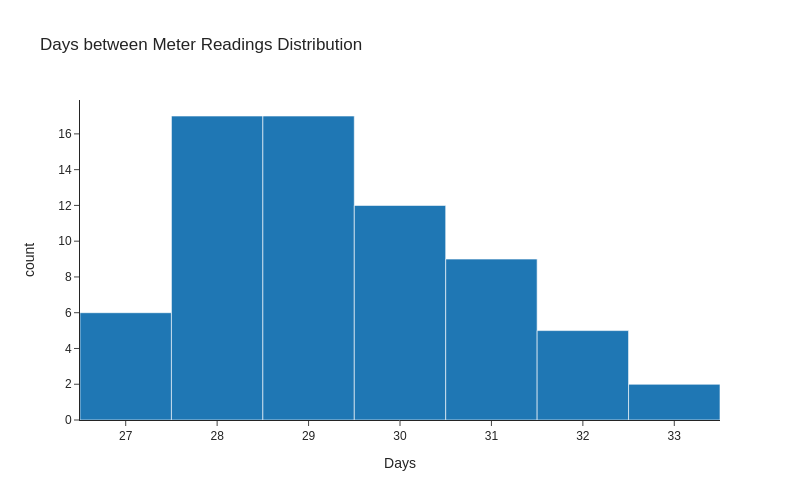

In [26]:
fig = px.histogram(df[1:-3], x='read_days', title='Days between Meter Readings Distribution', labels={'read_days': 'Days'})

show_fig()

#### 3.6 What is the distribution of my kWh per $ cost?

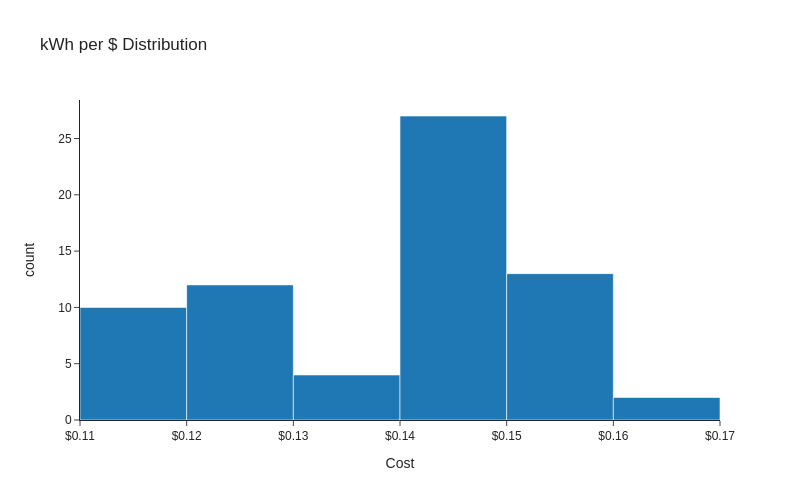

In [27]:
fig = px.histogram(df[1:-3], x='kwh_per_dollar', title='kWh per $ Distribution', labels={'kwh_per_dollar': 'Cost'})

fig.update_xaxes(tickprefix='$')

show_fig()

#### 3.7 What is the distribution of my monthly kWh consumption?

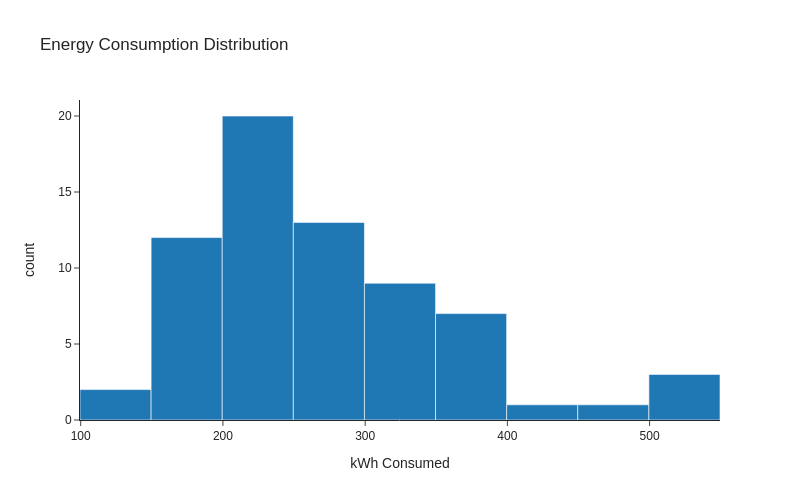

In [28]:
fig = px.histogram(df[1:-3], x='consumption_kwh', title='Energy Consumption Distribution', labels={'consumption_kwh': 'kWh Consumed'})

show_fig()

#### 3.8 What is the distribution of my monthly bill amounts?

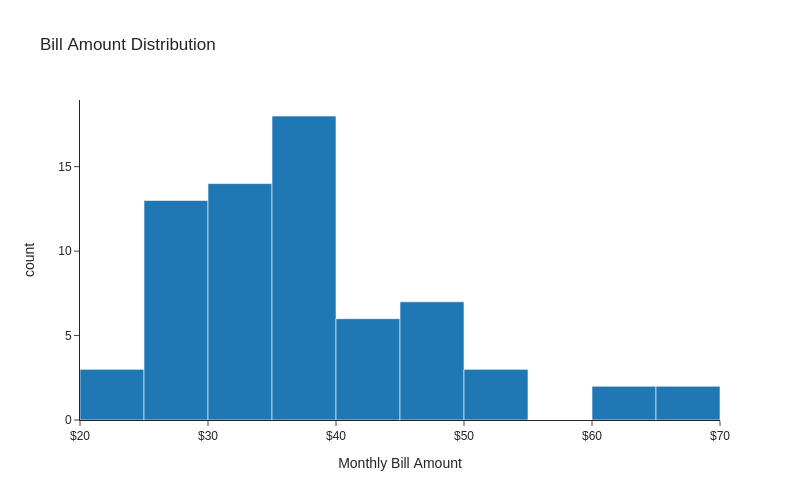

In [29]:
# hide the pro-rated Jan 2016 and Oct-Dec 2021 bills
fig = px.histogram(df[1:-3], x='consumption_bill_charges', title='Bill Amount Distribution', labels={'consumption_bill_charges': 'Monthly Bill Amount'})

# show the x-axis ticks prefixed with a $
fig.update_xaxes(tickprefix='$')

show_fig()

#### 3.9 How do each of my `Energy Consumption`, `Bill Charges`, `kWh per $`, `Basic Generation Service Rate`, and `Delivery Service Charge Rate` per month compare year-over-year?

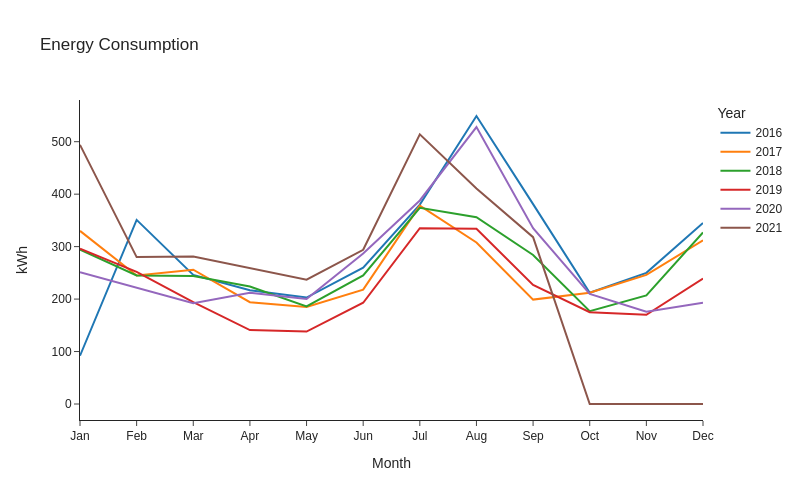

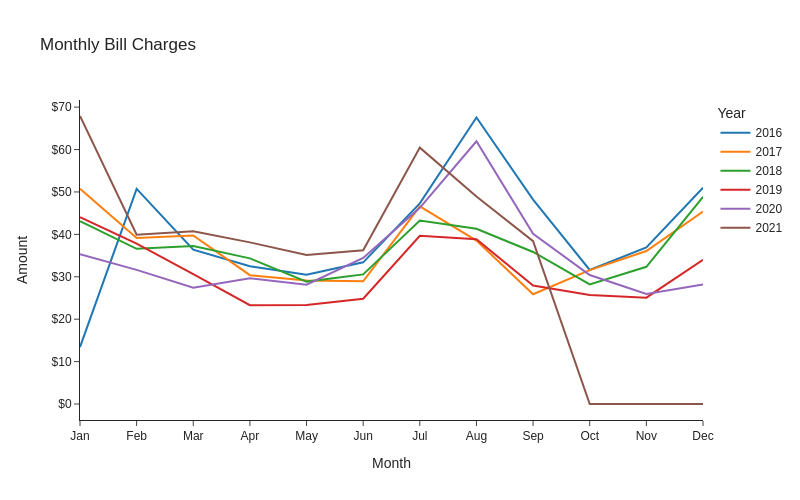

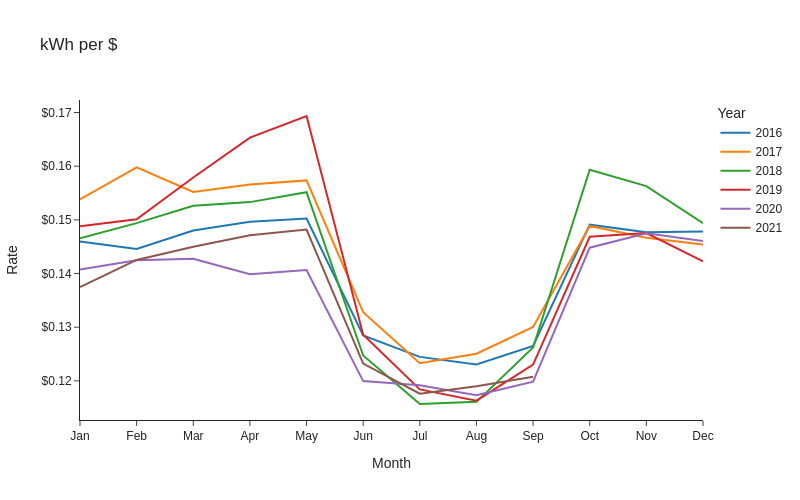

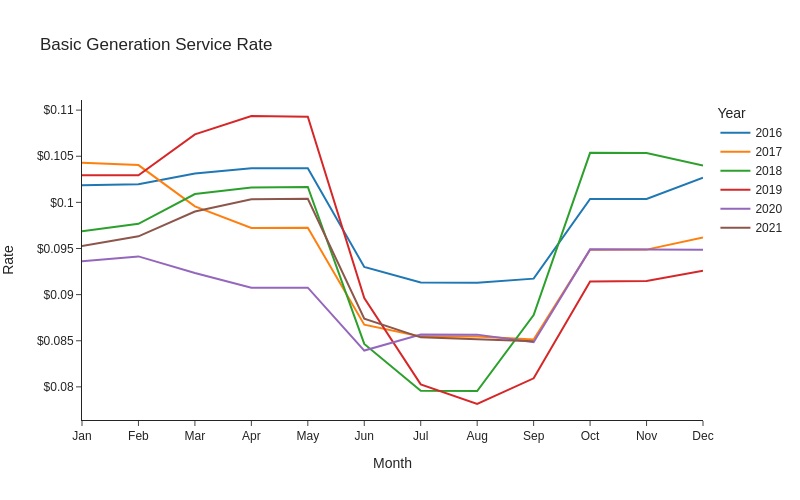

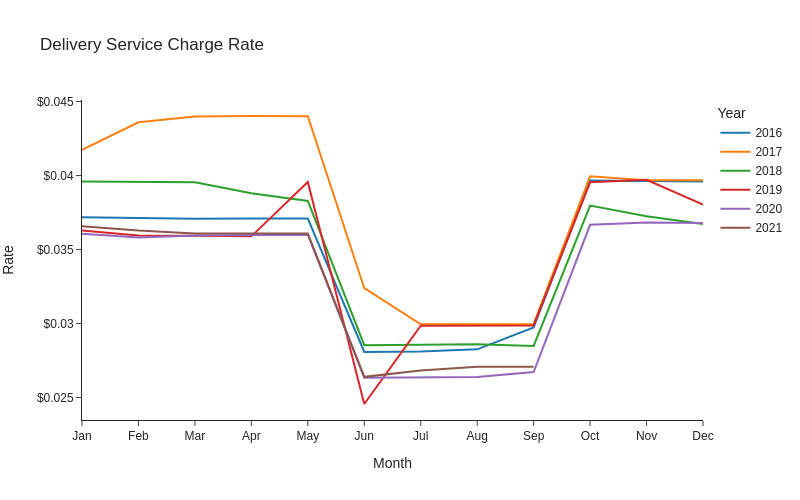

In [30]:
plt_y_data = ['consumption_kwh', 'consumption_bill_charges', 'kwh_per_dollar', 'basic_generation_service_rate', 'delivery_service_charge_rate']
plt_y_labels = ['kWh', 'Amount', 'Rate', 'Rate', 'Rate']
plt_titles = ['Energy Consumption', 'Monthly Bill Charges', 'kWh per $', 'Basic Generation Service Rate', 'Delivery Service Charge Rate']
plt_show_dollar_sign = [False, True, True, True, True]

for i in range(len(plt_y_data)):
    
    y_data = plt_y_data[i]
    y_label = plt_y_labels[i]
    title = plt_titles[i]
    show_dollar = plt_show_dollar_sign[i]
        
    fig = px.line(df, x='month', y=y_data,
        title=title,
        color='year',
        labels={'month': 'Month', 'year': 'Year', y_data: y_label},
        markers=False)
    
    if show_dollar:
        # show the y-axis ticks prefixed with a $
        fig.update_yaxes(tickprefix='$')
    
    show_fig()

During the summer (Jun-Sep) and winter (Dec & Jan) months, it's not surprising that both my energy consumption and bill amounts were high, due to my AC/heating and ceiling fans operating more frequently. My rates were the lowest during the summers as well.

#### 3.10 Does the average monthly temperature have any relation to these observations?

To answer this question, let's get what were the monthly average temperatures for my location during this period by utilizing the free weather API service [Open-Meteo](https://open-meteo.com/):

`https://open-meteo.com/en/docs/historical-weather-api#latitude=40.48&longitude=-74.29&start_date=2016-01-01&end_date=2021-12-31&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum&timezone=America%2FNew_York&temperature_unit=fahrenheit&windspeed_unit=mph&precipitation_unit=inch`

Let's make an API call and fetch the `json` file if it does not exist locally yet:

In [31]:
import os
import requests

weather_data_file = 'data/weather_2016-2021.csv'

if not os.path.exists(weather_data_file):
    url = 'https://archive-api.open-meteo.com/v1/archive?latitude=40.48&longitude=-74.29&start_date=2016-01-01&end_date=2021-12-31&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum&timezone=America%2FNew_York&temperature_unit=fahrenheit&windspeed_unit=mph&precipitation_unit=inch'
    response = requests.get(url)
    json = response.json()
    pd.DataFrame(json['daily']).to_csv(weather_data_file, index=False)                              

Let's load the file into a dataframe and set the `time` column as a `datetimeindex`:

In [32]:
df_weather = pd.read_csv(weather_data_file, index_col=0, parse_dates=['time'])

df_weather.head()

,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum
time,,,,,,,,,
2016-01-01,43.0,33.2,38.2,36.8,26.3,31.9,0.0,0.0,0.0
2016-01-02,39.7,29.6,33.9,31.9,23.5,27.2,0.0,0.0,0.0
2016-01-03,44.0,30.0,35.5,36.0,22.5,28.9,0.0,0.0,0.0
2016-01-04,31.8,18.0,27.8,26.3,4.0,18.1,0.0,0.0,0.0
2016-01-05,29.6,13.7,20.7,22.1,1.0,10.3,0.0,0.0,0.0


##### Definitions

| Variable                  | Description                                                              |
|---------------------------|--------------------------------------------------------------------------|
| temperature_2m_max        | Maximum daily air temperature at 2 meters above ground (°F)              |
| temperature_2m_min        | Minimum daily air temperature at 2 meters above ground(°F)               |
| temperature_2m_mean       | Mean daily air temperature at 2 meters above ground(°F)                  |
| apparent_temperature_max  | Maximum daily apparent temperature(°F)                                   |
| apparent_temperature_min  | Minimum daily apparent temperature(°F)                                   |
| apparent_temperature_mean | Mean daily apparent temperature(°F)                                      |
| precipitation_sum         | Sum of daily precipitation (including rain, showers and snowfall) (inch) |
| rain_sum                  | Sum of daily rain (inch)                                                 |
| snowfall_sum              | Sum of daily snowfall (inch)                                             |

*Apparent temperature* is the perceived feels-like temperature combining wind chill factor, relative humidity and solar radiation.

In [33]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2016-01-01 to 2021-12-31
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   temperature_2m_max         2192 non-null   float64
 1   temperature_2m_min         2192 non-null   float64
 2   temperature_2m_mean        2192 non-null   float64
 3   apparent_temperature_max   2192 non-null   float64
 4   apparent_temperature_min   2192 non-null   float64
 5   apparent_temperature_mean  2192 non-null   float64
 6   precipitation_sum          2192 non-null   float64
 7   rain_sum                   2192 non-null   float64
 8   snowfall_sum               2192 non-null   float64
dtypes: float64(9)
memory usage: 171.2 KB


We have all 2,192 days from `01/01/16` to `12/31/21` but we need them as monthly averages. Let's do that and add in other time series columns as well:

In [34]:
# convert to monthly averages
df_weather = df_weather.iloc[:, :9].resample('MS').mean().round(2)

df_weather['month'] = df_weather.index.strftime('%b')
df_weather['year'] = df_weather.index.year

df_weather

,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,month,year
time,,,,,,,,,,,
2016-01-01,38.25,24.06,30.92,31.97,16.52,24.31,0.12,0.05,0.48,Jan,2016
2016-02-01,42.97,26.98,35.08,36.82,21.38,28.76,0.12,0.09,0.21,Feb,2016
2016-03-01,55.57,37.85,46.28,49.49,33.31,41.14,0.04,0.03,0.09,Mar,2016
2016-04-01,60.21,41.79,50.46,55.87,37.92,46.77,0.09,0.09,0.01,Apr,2016
2016-05-01,68.50,52.22,59.95,67.58,52.33,59.56,0.12,0.12,0.00,May,2016
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,83.52,69.57,75.88,88.90,75.10,81.72,0.22,0.22,0.00,Aug,2021
2021-09-01,76.30,63.03,69.21,78.00,64.65,71.64,0.14,0.14,0.00,Sep,2021
2021-10-01,68.56,56.13,61.94,67.37,54.32,61.12,0.23,0.23,0.00,Oct,2021


Now that we have our monthly average temperatures, let's plot them as a second y-axis:

#### 3.10.1 kWh Consumption

In [53]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# add footnote
def add_footnote(text):
    fig.add_annotation(
        text = text
        , showarrow=False
        , x = 0
        , y = -0.15
        , xref='paper'
        , yref='paper' 
        , xanchor='left'
        , yanchor='bottom'
        , xshift=-1
        , yshift=-15
        , font=dict(size=10, color="grey")
        , align="left"
        ,)

# list of all the years in str
years = [format(x, 'd') for x in list(df.year.unique())]

def plot_dual_y_axes(year, column_name, legend_name, y_axis_title, footnote_text, show_dollar=False):
    df_1_year = df.query('year==' + year)
    df_1_year_weather = df_weather.query('year==' + year)

    # add traces
    fig.add_trace(
        go.Bar(x=df_1_year['month'], y=df_1_year[column_name], name=legend_name),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=df_1_year_weather['month'], y=df_1_year_weather['apparent_temperature_mean'], name='Mean Temperature'),
        secondary_y=True,
    )

    # add figure title
    fig.update_layout(title_text=year)

    # add x-axis title
    fig.update_xaxes(title_text='Month')

    # add y-axes titles
    fig.update_yaxes(title_text=y_axis_title, secondary_y=False)
    fig.update_yaxes(title_text='Temperature', ticksuffix='°F', secondary_y=True)
    
    # add summer season annotation
    fig.add_vrect(x0='Jun', x1='Sep',
                  annotation_text='Summer'
                  , annotation_position='top left'
                  , annotation=dict(font_size=12)
                  , fillcolor='orange'
                  , opacity=0.15
                  , line_width=0)
    
    # show the y-axis ticks prefixed with a $
    if show_dollar:
        fig.update_yaxes(tickprefix='$', secondary_y=False)

    # add footnote
    add_footnote(footnote_text)
    
    # write image
    # fig.write_image(f'images/{year}_{column_name}.png')
    
    show_fig()

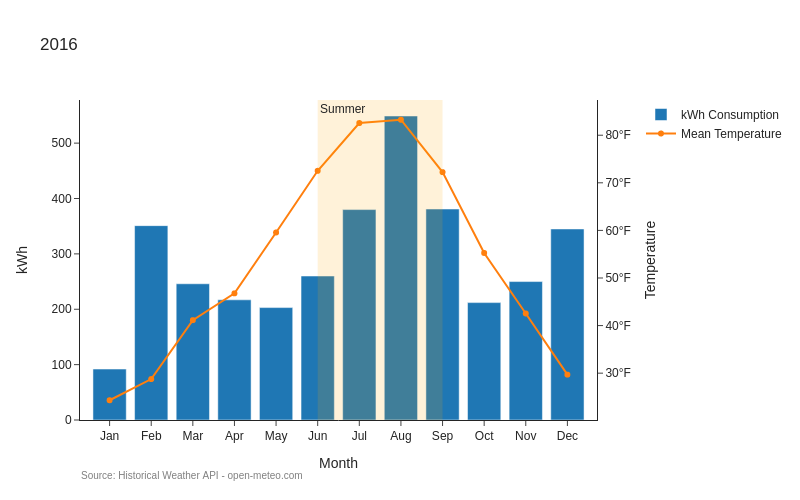

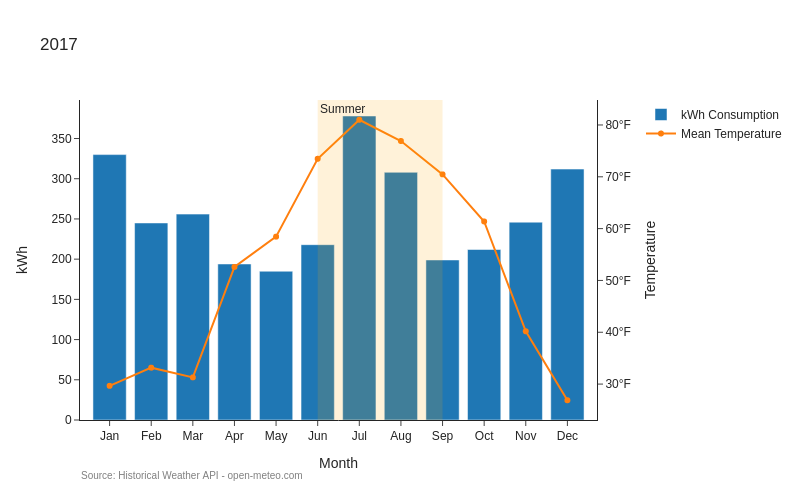

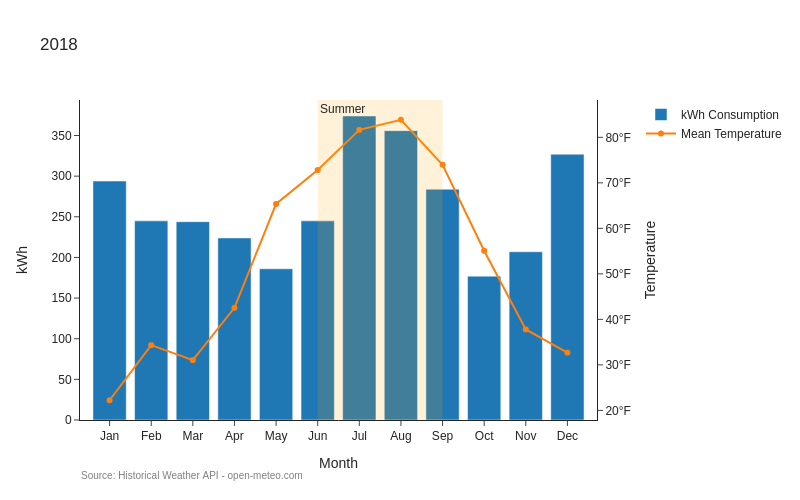

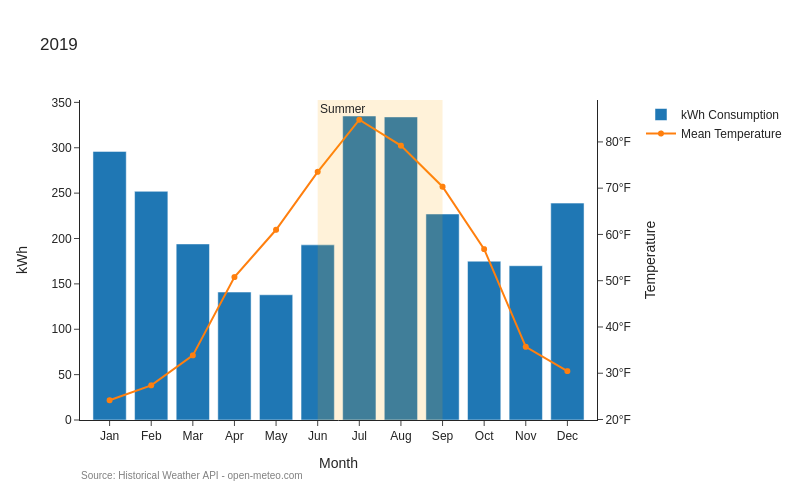

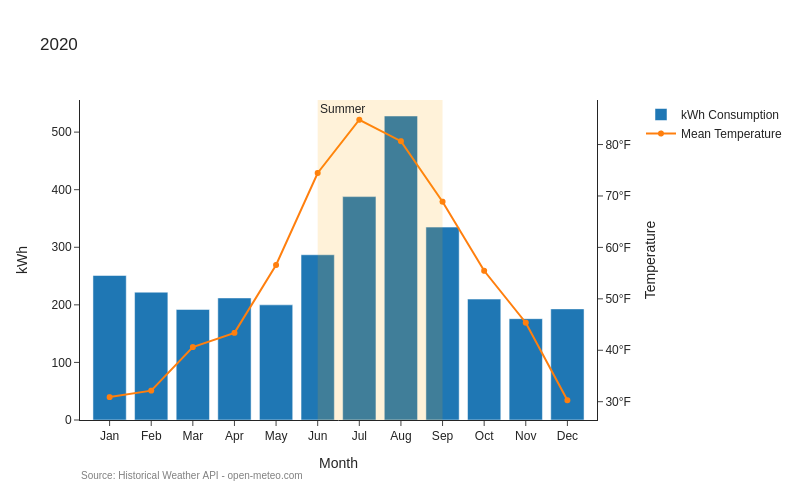

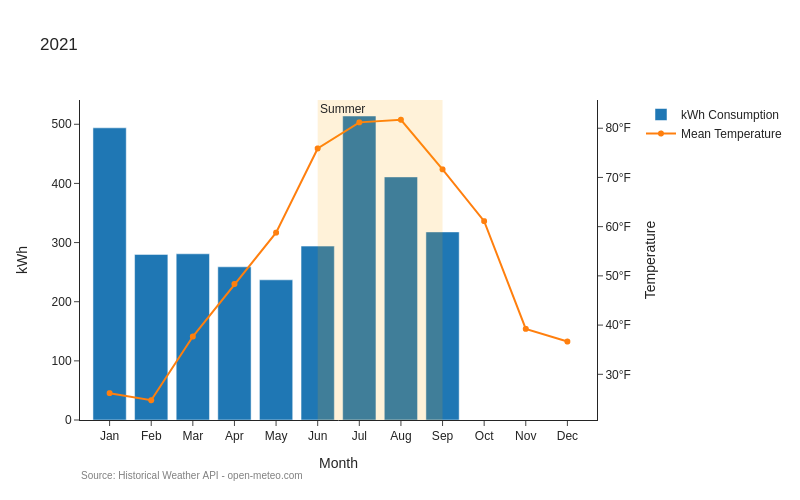

In [54]:
for year in years:
    footnote_text = 'Source: Historical Weather API - <a href="https://open-meteo.com/">open-meteo.com</a>'
    fig = make_subplots(specs=[[{'secondary_y': True}]])
    plot_dual_y_axes(year=year, column_name='consumption_kwh', legend_name='kWh Consumption', y_axis_title='kWh', footnote_text=footnote_text)

Of course there is a relationship between the summer and winter temperatures and the total energy consumed.

#### 3.10.2 Monthly Bill Charges

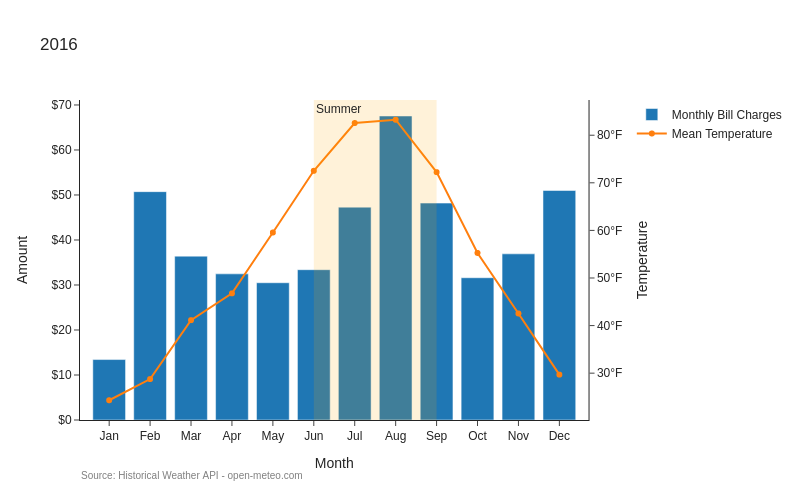

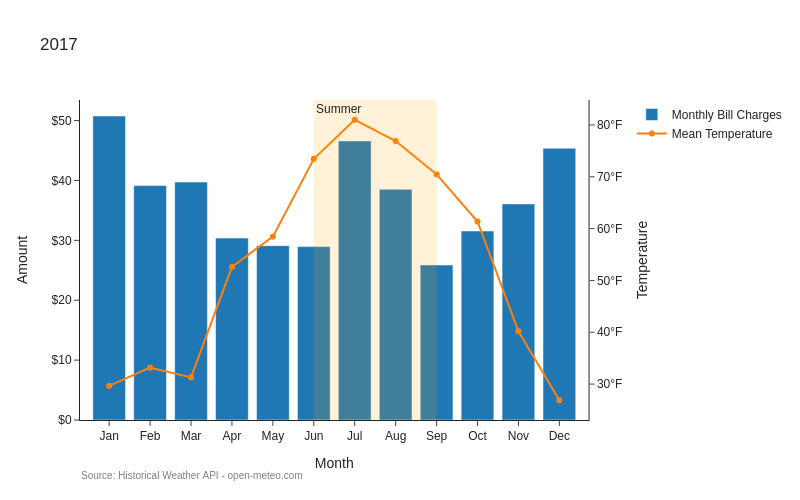

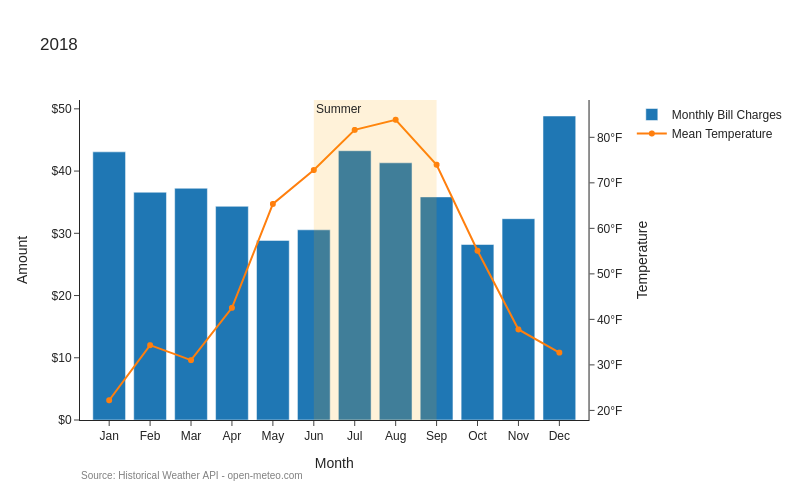

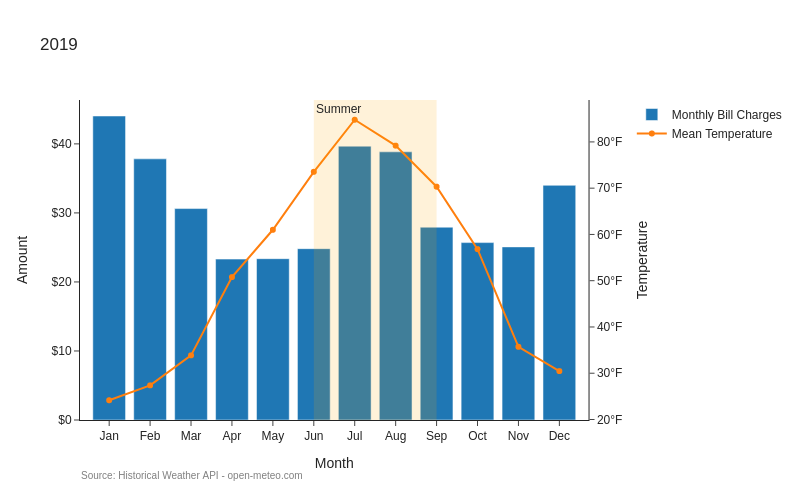

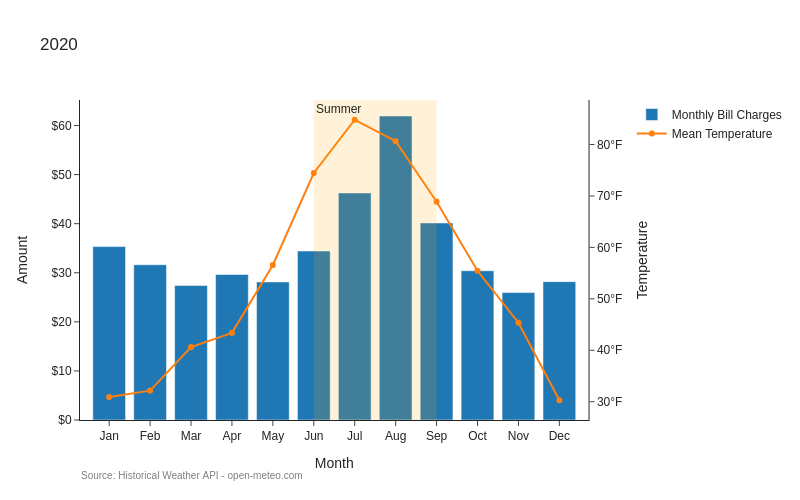

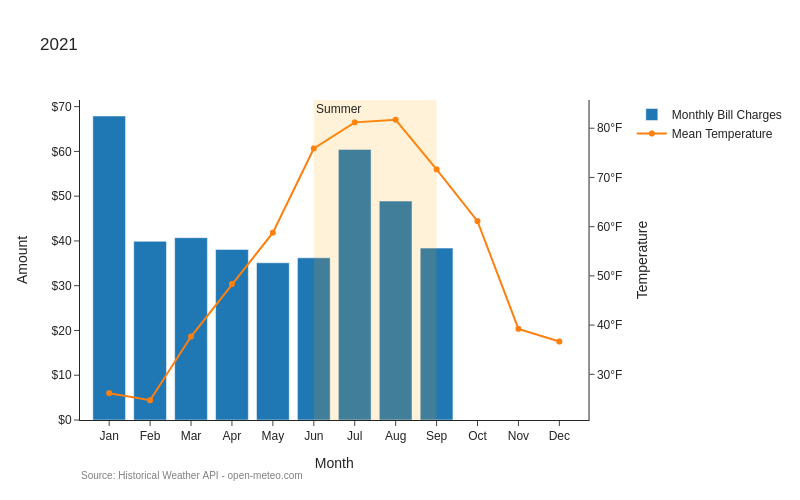

In [37]:
for year in years:
    footnote_text = 'Source: Historical Weather API - <a href="https://open-meteo.com/">open-meteo.com</a>'
    fig = make_subplots(specs=[[{'secondary_y': True}]])
    plot_dual_y_axes(year=year, column_name='consumption_bill_charges', legend_name='Monthly Bill Charges', y_axis_title='Amount', footnote_text=footnote_text, show_dollar=True)

Related to energy consumption, as my usage increased so did my bill amount.

#### 3.10.3 kWh per $

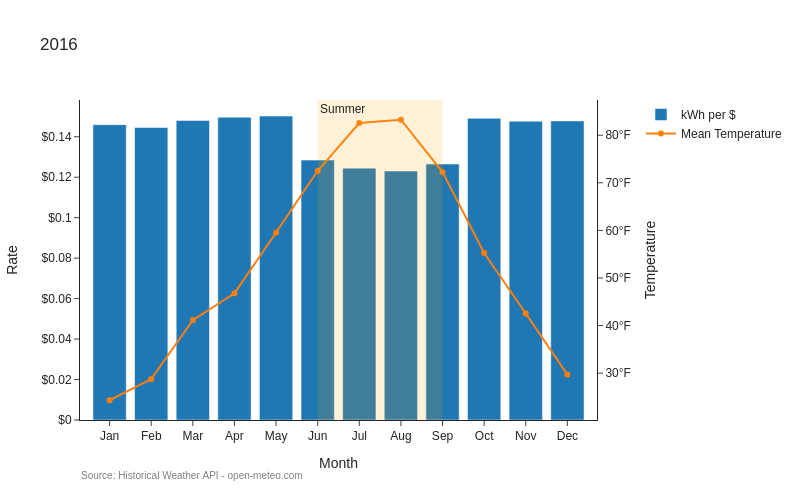

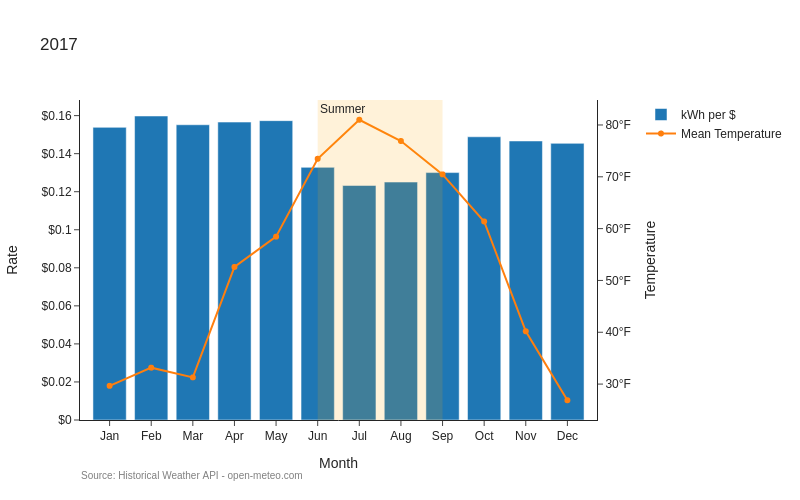

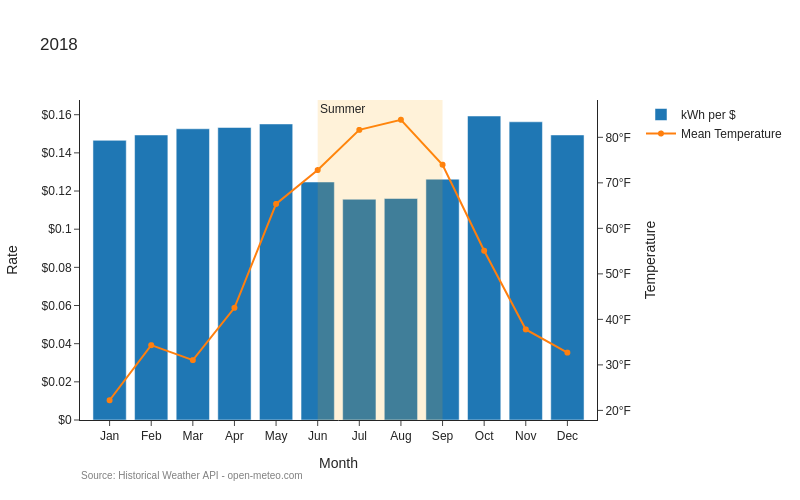

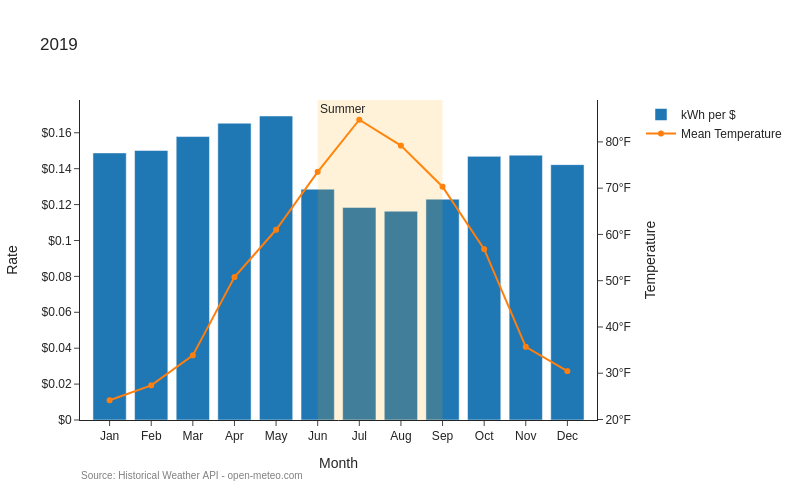

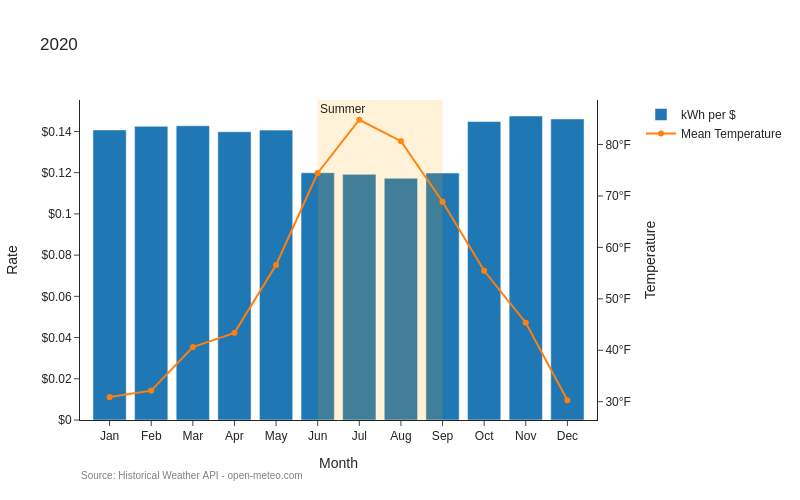

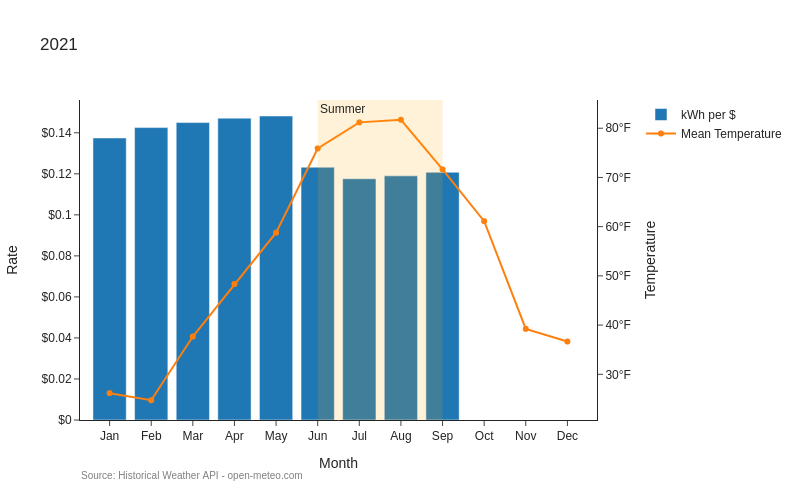

In [38]:
for year in years:
    footnote_text = 'Source: Historical Weather API - <a href="https://open-meteo.com/">open-meteo.com</a>'
    fig = make_subplots(specs=[[{'secondary_y': True}]])
    plot_dual_y_axes(year=year, column_name='kwh_per_dollar', legend_name='kWh per $', y_axis_title='Rate', footnote_text=footnote_text, show_dollar=True)

My `kWh per $` rates were lowest during the summer months, and this could be from the tiered billing rates.

#### 3.11 How did I compare to the national averages?

The U.S. Energy Information Administration [eia.gov](https://www.eia.gov/) has data from 2021 on averages on a state level. 

- Electric Sales, Revenue, and Average Price: https://www.eia.gov/electricity/sales_revenue_price/
- 2021 Average Monthly Bill- Residential: https://www.eia.gov/electricity/sales_revenue_price/pdf/table5_a.pdf

I've converted it to a `.tsv` file. Let's load it in and plot it in charts with my 2021 data:

In [39]:
df_eia_2021 = pd.read_csv('data/2021_average_monthly_bill_residential.tsv', sep='\t', header=0,
                         names=['state', 'num_of_customers', 'avg_consumption_kwh', 'avg_price_cents', 'avg_monthly_bill'],
                         usecols=['state', 'avg_consumption_kwh', 'avg_price_cents', 'avg_monthly_bill']
                         )

df_eia_2021.head()

,state,avg_consumption_kwh,avg_price_cents,avg_monthly_bill
0,Connecticut,713,21.91,156.21
1,Maine,584,17.02,99.44
2,Massachusetts,596,22.89,136.37
3,New Hampshire,631,19.85,125.24
4,Rhode Island,585,22.30,130.40


In [40]:
df_eia_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   avg_consumption_kwh  51 non-null     object 
 2   avg_price_cents      51 non-null     float64
 3   avg_monthly_bill     51 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.7+ KB


In [41]:
df_eia_2021.sort_values('avg_consumption_kwh').head()

,state,avg_consumption_kwh,avg_price_cents,avg_monthly_bill
18,Nebraska,"1,005",10.75,108.09
20,South Dakota,"1,019",12.22,124.50
17,Missouri,"1,039",11.41,118.55
19,North Dakota,"1,041",10.85,112.93
38,Arizona,"1,048",12.54,131.35


The `avg_consumption_kwh` column is a string because some of the values contain a comma. Let's remove them and convert the column to `int`:

In [42]:
col = 'avg_consumption_kwh'

df_eia_2021[col] = [x.replace(',', '') for x in df_eia_2021[col]]
df_eia_2021[col] = df_eia_2021[col].astype(int)

df_eia_2021.sort_values('avg_consumption_kwh', ascending=False).head()

,state,avg_consumption_kwh,avg_price_cents,avg_monthly_bill
35,Louisiana,1192,11.02,131.37
33,Tennessee,1183,11.07,130.98
32,Mississippi,1171,11.56,135.31
30,Alabama,1140,12.96,147.75
34,Arkansas,1098,11.27,123.69


In [43]:
df_eia_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   avg_consumption_kwh  51 non-null     int64  
 2   avg_price_cents      51 non-null     float64
 3   avg_monthly_bill     51 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


In [55]:
def plot_avg_comparison(df_1, df_2, column_name, y_label, title, annotated_text, footnote_text, show_dollar):
    # personal->eia column mapping
    eia_col_map = { 'consumption_kwh': 'avg_consumption_kwh', 'kwh_per_dollar': 'avg_price_cents', 'consumption_bill_charges': 'avg_monthly_bill' }

    eia_avg_data = df_2[eia_col_map[column_name]].item()

    # convert decimal cents
    if column_name == 'kwh_per_dollar':
        eia_avg_data /= 100
        
    if show_dollar:
        annotated_text += '$' + str(eia_avg_data)
    else:
        annotated_text += str(eia_avg_data)

    # bar plot
    fig.add_trace(
        go.Bar(x=df_1['month'], y=df_1[column_name])
    )

    # add annotated horizontal line denoting nj avg
    fig.add_hline(y=eia_avg_data, line_dash='dash'
                  , annotation_text=annotated_text
                  , annotation_position='bottom right'
                  , annotation_font_size=10
                  , annotation_font_color='black'
                  , line_width=3
                  , line_color='green')

    fig.update_layout(title_text=title)

    fig.update_xaxes(title_text='Month')
    fig.update_yaxes(title_text=y_label)

    if show_dollar:
        # show the y-axis ticks prefixed with a $
        fig.update_yaxes(tickprefix='$')

    # footnote
    add_footnote(footnote_text)
    
    # write image
    # fig.write_image(f'images/{year}_{column_name}_eia.png')

    show_fig()
    
def print_stats():
    print(round(df_1.consumption_kwh.mean(), 2), 'average kWh per month')
    print('${:,.2f}'.format(df_1.consumption_bill_charges.mean()), 'average monthly bill')
    print('$', round(df_1.kwh_per_dollar.mean(), 6), 'average kwh per dollar per month')

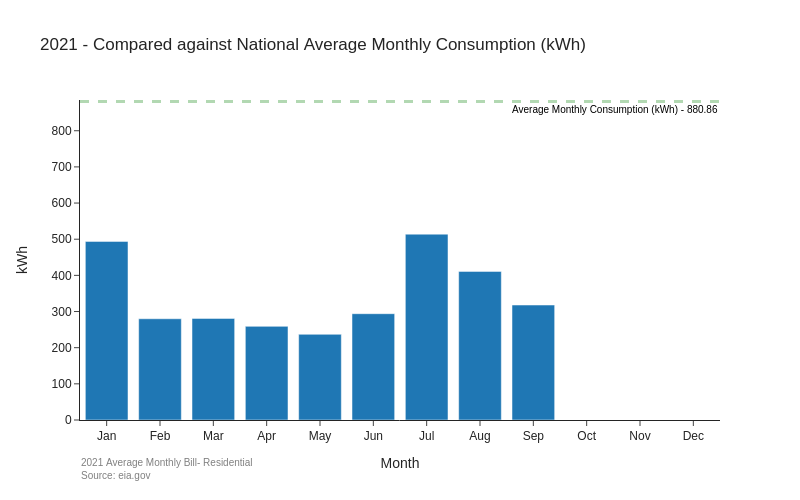

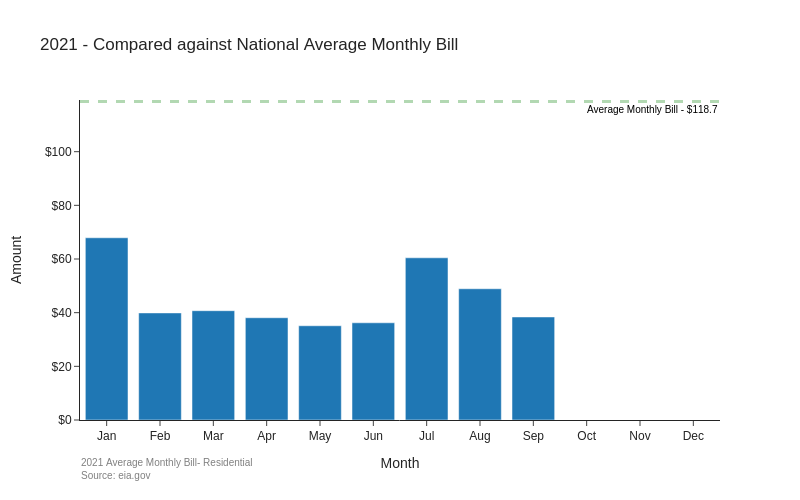

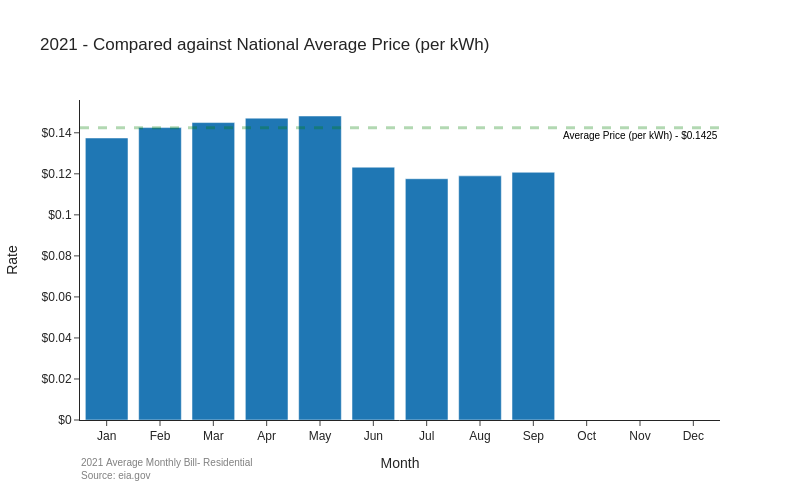

257.33 average kWh per month
$33.81 average monthly bill
$ 0.133435 average kwh per dollar per month


In [56]:
plt_y_data = ['consumption_kwh', 'consumption_bill_charges', 'kwh_per_dollar']
plt_y_labels = ['kWh', 'Amount', 'Rate']
plt_titles = ['2021 - Compared against National Average Monthly Consumption (kWh)', '2021 - Compared against National Average Monthly Bill', '2021 - Compared against National Average Price (per kWh)']
plt_show_dollar_sign = [False, True, True]

# use my 2021 data
df_1 = df.query('year==2021')

# calculate the mean across all states
df_2 = df_eia_2021.mean(numeric_only=['avg_consumption_kwh', 'avg_price_cents', 'avg_monthly_bill']).round(2)

for i in range(len(plt_y_data)):
    y_data = plt_y_data[i]
    y_label = plt_y_labels[i]
    title = plt_titles[i]
    show_dollar = plt_show_dollar_sign[i]
    annotated_text = title[33:] + ' - '
    footnote_text = '2021 Average Monthly Bill- Residential<br>Source: <a href="https://www.eia.gov/electricity/sales_revenue_price/pdf/table5_a.pdf">eia.gov</a>'
    
    fig = make_subplots()
    plot_avg_comparison(df_1=df_1
                        , df_2=df_2
                        , column_name=y_data
                        , y_label=y_label
                        , title=title
                        , annotated_text=annotated_text
                        , footnote_text=footnote_text
                        , show_dollar=show_dollar)

print_stats()

For 2021, my usage and monthly bill amounts were both below the national averages, `71%` lower. This can be explained because I was a 1-person household during most of my residence; I did not consume nor paid nearly as much as a larger family household or a larger square footage home.

My average price per kWh looked to be about `$0.009` (0.9¢ cents) below the national average.

#### 3.12 How did I compare to the NJ state averages?

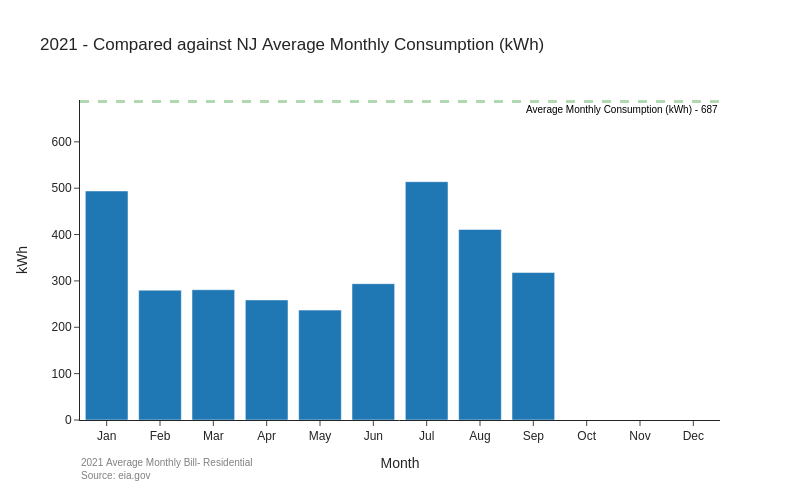

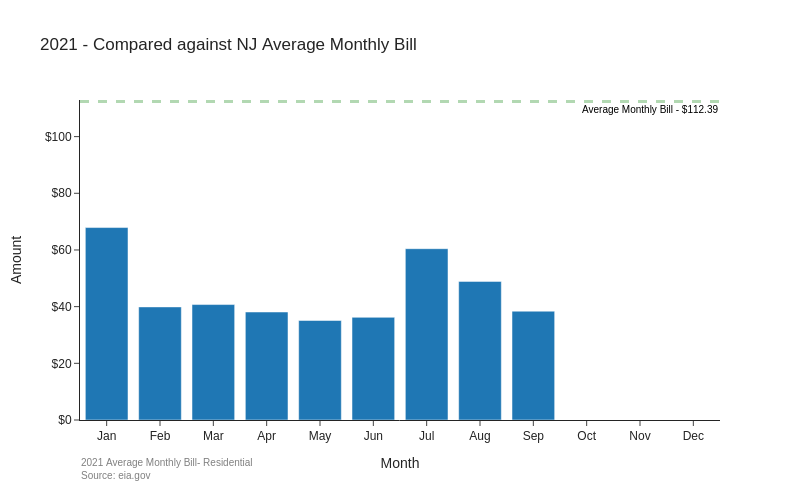

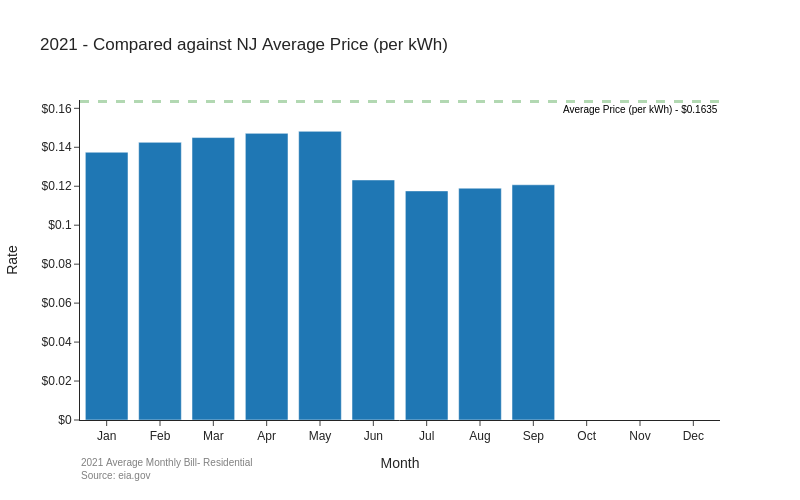

257.33 average kWh per month
$33.81 average monthly bill
$ 0.133435 average kwh per dollar per month


In [57]:
plt_titles = ['2021 - Compared against NJ Average Monthly Consumption (kWh)', '2021 - Compared against NJ Average Monthly Bill', '2021 - Compared against NJ Average Price (per kWh)']
df_2 = df_eia_2021.query('state=="New Jersey"')

for i in range(len(plt_y_data)):
    y_data = plt_y_data[i]
    y_label = plt_y_labels[i]
    title = plt_titles[i]
    show_dollar = plt_show_dollar_sign[i]
    annotated_text = title[27:] + ' - '
    footnote_text = '2021 Average Monthly Bill- Residential<br>Source: <a href="https://www.eia.gov/electricity/sales_revenue_price/pdf/table5_a.pdf">eia.gov</a>'
    
    fig = make_subplots()
    plot_avg_comparison(df_1=df_1
                        , df_2=df_2
                        , column_name=y_data
                        , y_label=y_label
                        , title=title
                        , annotated_text=annotated_text
                        , footnote_text=footnote_text
                        , show_dollar=show_dollar)
    
print_stats()

As with the national averages, both my usage and monthly bill amounts were below the NJ state averages as well. 63% and 70% below, respectively.

My average price per kWh was about `$0.03` (3¢ cents) below the state average.

#### 3.13 How did I compare to the JCP&L averages?

[eia.gov](https://www.eia.gov/) also has data from 2021 on price averages by entity.

- Electric Sales, Revenue, and Average Price: https://www.eia.gov/electricity/sales_revenue_price/
- 2021 Utility Bundled Sales to Ultimate Customers- Residential: https://www.eia.gov/electricity/sales_revenue_price/pdf/table6.pdf

Plotting JCP&L's average price, my average price was a tad bit higher, 0.001535 (0.15¢ cents).

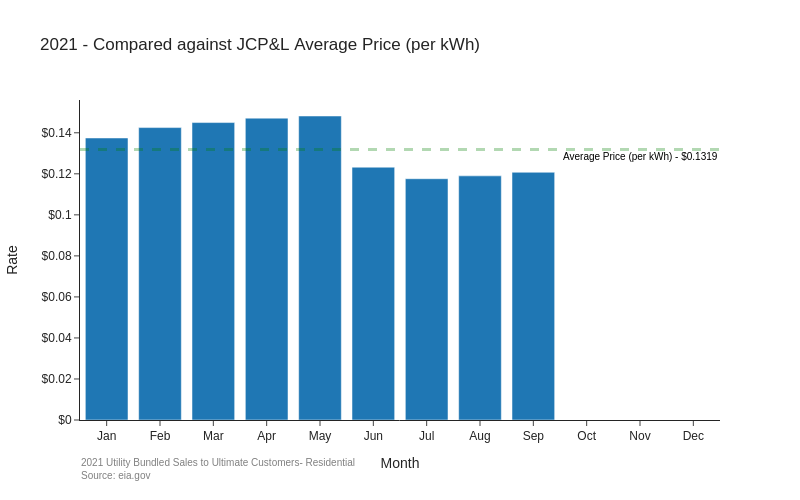

257.33 average kWh per month
$33.81 average monthly bill
$ 0.133435 average kwh per dollar per month


In [47]:
df_2 = pd.DataFrame(data={'avg_price_cents': [13.19]})
title = '2021 - Compared against JCP&L Average Price (per kWh)'
annotated_text = title[30:] + ' - '

fig = make_subplots()
footnote_text = '2021 Utility Bundled Sales to Ultimate Customers- Residential<br>Source: <a href="https://www.eia.gov/electricity/sales_revenue_price/pdf/table6.pdf">eia.gov</a>'
plot_avg_comparison(df_1=df_1
                    , df_2=df_2
                    , column_name='kwh_per_dollar'
                    , y_label='Rate'
                    , title=title
                    , annotated_text=annotated_text
                    , footnote_text=footnote_text
                    , show_dollar=True)

print_stats()

#### 3.14 In 2021, how did I compare to the NJ state averages if we were to resample Oct-Dec from the previous years' months?

For Oct-Dec 2021, let's calculate the averages of the same months from the previous years:

In [48]:
df.query('month in ["Oct", "Nov", "Dec"] and not year==2021')[['consumption_kwh', 'consumption_bill_charges', 'kwh_per_dollar', 'month']].sort_values('month', ascending=False)

,consumption_kwh,consumption_bill_charges,kwh_per_dollar,month
statement_date,,,,
2016-10-19,212,31.61,0.149104,Oct
2017-10-23,212,31.56,0.148868,Oct
2018-10-19,177,28.20,0.159322,Oct
2019-10-21,175,25.70,0.146857,Oct
2020-10-20,210,30.41,0.144810,Oct
2016-11-18,250,36.92,0.147680,Nov
2017-11-21,246,36.08,0.146667,Nov
2018-11-20,207,32.35,0.156280,Nov
2019-11-18,170,25.08,0.147529,Nov


In [49]:
df_2021_octnovdec_avgs = df.query('month in ["Oct", "Nov", "Dec"] and not year==2021')[['consumption_kwh', 'consumption_bill_charges', 'kwh_per_dollar', 'month']].groupby('month').mean()

df_2021_octnovdec_avgs

,consumption_kwh,consumption_bill_charges,kwh_per_dollar
month,,,
Dec,283.2,41.482,0.146191
Nov,209.8,31.278,0.149131
Oct,197.2,29.496,0.149792


Let's create a copy of the dataframe and update those 3 months with the data above:

In [50]:
df_2021 = df_1.copy()

df_2021[['consumption_kwh', 'consumption_bill_charges', 'kwh_per_dollar', 'month']].tail(3)

,consumption_kwh,consumption_bill_charges,kwh_per_dollar,month
statement_date,,,,
2021-10-01,0,0.0,NaN,Oct
2021-11-01,0,0.0,NaN,Nov
2021-12-01,0,0.0,NaN,Dec


In [51]:
# update with the calculated averages
for month in df_2021_octnovdec_avgs.index.tolist():
    for col in df_2021_octnovdec_avgs.columns[:3]:
        df_2021.at[f'{month} 2021', col] = df_2021_octnovdec_avgs.loc[month, col]

df_2021[['consumption_kwh', 'consumption_bill_charges', 'kwh_per_dollar', 'month']].tail(3)

,consumption_kwh,consumption_bill_charges,kwh_per_dollar,month
statement_date,,,,
2021-10-01,197.2,29.496,0.149792,Oct
2021-11-01,209.8,31.278,0.149131,Nov
2021-12-01,283.2,41.482,0.146191,Dec


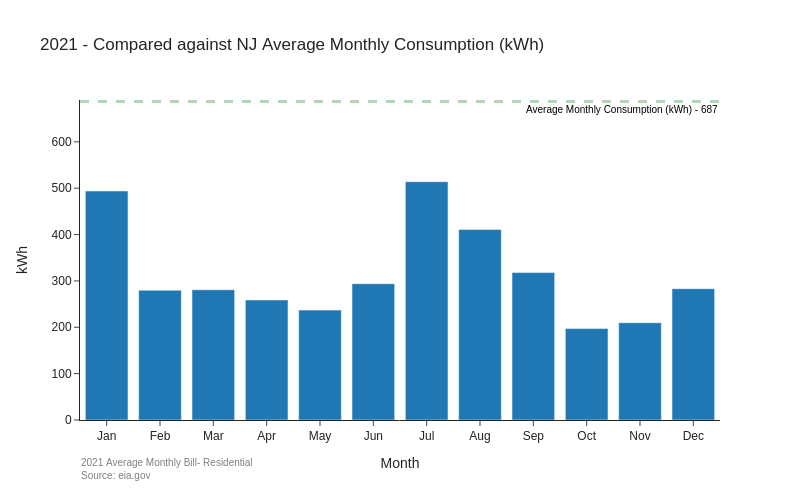

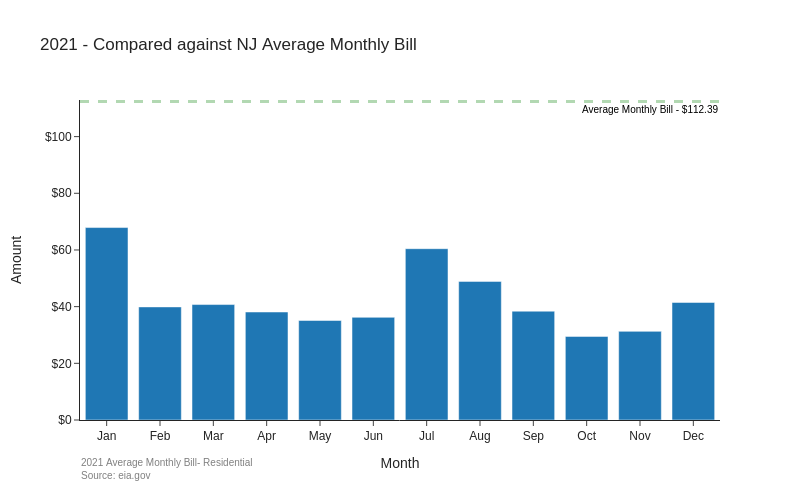

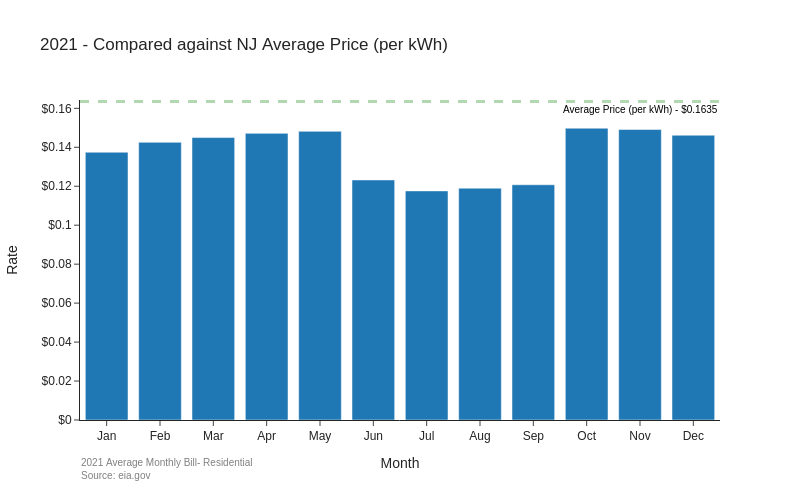

314.85 average kWh per month
$42.34 average monthly bill
$ 0.137169 average kwh per dollar per month


In [52]:
plt_titles = ['2021 - Compared against NJ Average Monthly Consumption (kWh)', '2021 - Compared against NJ Average Monthly Bill', '2021 - Compared against NJ Average Price (per kWh)']
df_1 = df_2021
df_2 = df_eia_2021.query('state=="New Jersey"')

for i in range(len(plt_y_data)):
    y_data = plt_y_data[i]
    y_label = plt_y_labels[i]
    title = plt_titles[i]
    show_dollar = plt_show_dollar_sign[i]
    annotated_text = title[27:] + ' - '
    footnote_text = '2021 Average Monthly Bill- Residential<br>Source: <a href="https://www.eia.gov/electricity/sales_revenue_price/pdf/table5_a.pdf">eia.gov</a>'
    
    fig = make_subplots()
    plot_avg_comparison(df_1=df_1
                        , df_2=df_2
                        , column_name=y_data
                        , y_label=y_label
                        , title=title
                        , annotated_text=annotated_text
                        , footnote_text=footnote_text
                        , show_dollar=show_dollar)
    
print_stats()

With the resampled data for Oct-Dec, we can see both my usage and monthly bill amounts were still below the NJ state averages, now 54% and 63% below, respectively.

My average price per kWh was about `$0.026331` (2.6¢ cents, 0.4¢ cents lower than my actual) below the state average.

### 4. Conclusion

This analysis confirms some of my initial guesses before diving deep into it, that:

- My usage and monthly bill amounts where below the JCP&L, state, and national averages. This is not surprising as I was living solo.
- They were higher in the winter and summer months compared to other months due to the weather and temperatures

My assumption is that the majority of my usages are from the HVAC unit. A `Kill A Watt` monitor would be great to utilize in seeing how much percentage of my consumption are from my various electronic devices such as my NAS, Mac Mini, TVs, etc.

A future recommendation is to add annotations where I can explain some of the high and low usage months, such as when I had others staying with me (high usage) and events like long vacations and time away (low usage).